Author: Karatpetch(Kara) Jiwachotkamjon

# 2023 Wharton X Teach for America People analytics competion

### Project objective: Teach for America(TFA)  continuously studies and refines the admissions process to select those who will have the most impact, to improve corps completion, and to increase matriculation. In this analysis, I will focus on the preliminary study on how each level affect the completion in each funnel of application process

The first part of the project will involve the Correlation and Clustering analysis which will be included in this paper. Then, the predictive model will be conducted from the results of Clustering analysis as the result of this paper.

## 1) Correlation by funnel or progress

In [ ]:
!pip uninstall  Flask Jinja2

In [12]:
from markupsafe import Markup

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for plotting graphs
import warnings
warnings.filterwarnings("ignore")
cd = pd.read_csv("master_data_before_cluster.csv")

### 1.1)  Correlation of Invited and complete interview candidate

In order to understand the evaluation criteria and characteristics of current candidate who received interview invite, we need to explore the correlation between the relevant factors and the Progress 1.

In [484]:
cs = cd

In [488]:
cs = cs[['App_start_month','App_submit_month','cf_year','ComfirmOffer_month','Day_diff_start_submit','career_level_int','UG_school_selectivity_int','UG_school_name','UG_major_byGroup',
         'UG_major_minor_STEM','UG_major_bySchool','Forbes_ranking','UG_GPA','UG_sports',
         'UG_PellGrant', 'pell_grant_amount','Leadership_role','LIC_served_self_report',
         'count_applicantions','Progress_1_Invite_Intrvw','Progress_2_Complete_Intrvw']]

In [489]:
#cs['Progress_3_Accepted_toCorp'] = cs['Progress_3_Accepted_toCorp'].replace(True,1).replace(False,0)
#cs['Progress_3_Accepted_toCorp'] = cs['Progress_3_Accepted_toCorp'].replace(True,1).replace(False,0)

cs['Progress_1_Invite_Intrvw'] = cs['Progress_1_Invite_Intrvw'].replace(True,1).replace(False,0)
cs['Progress_2_Complete_Intrvw'] = cs['Progress_2_Complete_Intrvw'].replace(True,1).replace(False,0)

In [490]:
cs['UG_sports'] = cs['UG_sports'].replace(np.nan,0)
cs['Leadership_role'] = cs['Leadership_role'].replace(np.nan,0)
cs['LIC_served_self_report'] = cs['LIC_served_self_report'].replace(np.nan,0)
cs['UG_PellGrant'] = cs['UG_PellGrant'].replace('MAXIMUM',2).replace('NO',0).replace('PARTIAL',1)
cs['UG_sports'] = cs['UG_sports'].apply(pd.to_numeric)
cs['UG_PellGrant'] = cs['UG_PellGrant'].astype('category').cat.codes
cs['Day_diff_start_submit'] = cs['Day_diff_start_submit'].apply(pd.to_numeric)
cs['Progress_2_Complete_Intrvw'] = cs['Progress_2_Complete_Intrvw'].apply(pd.to_numeric)
cs['Progress_1_Invite_Intrvw'] = cs['Progress_1_Invite_Intrvw'].apply(pd.to_numeric)
cs['UG_major_bySchool']=cs['UG_major_bySchool'].astype('category').cat.codes
#cs['Match_Teach']=cs['Match_Teach'].astype('category').cat.codes
#cs['match_and_offer']=cs['match_and_offer'].astype('category').cat.codes
#cs['Uni_Match_state']=cs['Uni_Match_state'].astype('category').cat.codes
cs['UG_major_byGroup']=cs['UG_major_byGroup'].astype('category').cat.codes
cs['Leadership_role']=cs['Leadership_role'].astype('category').cat.codes
cs['UG_school_name']=cs['UG_school_name'].astype('category').cat.codes
cs['LIC_served_self_report']=cs['LIC_served_self_report'].astype('category').cat.codes

In [491]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250602 entries, 0 to 250601
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   App_start_month             250602 non-null  int64  
 1   App_submit_month            250414 non-null  float64
 2   cf_year                     23602 non-null   float64
 3   ComfirmOffer_month          23602 non-null   float64
 4   Day_diff_start_submit       250602 non-null  int64  
 5   career_level_int            250602 non-null  int64  
 6   UG_school_selectivity_int   250602 non-null  int64  
 7   UG_school_name              250602 non-null  int8   
 8   UG_major_byGroup            250602 non-null  int8   
 9   UG_major_minor_STEM         250602 non-null  int64  
 10  UG_major_bySchool           250602 non-null  int8   
 11  Forbes_ranking              250602 non-null  int64  
 12  UG_GPA                      250602 non-null  float64
 13  UG_sports     

<AxesSubplot:>

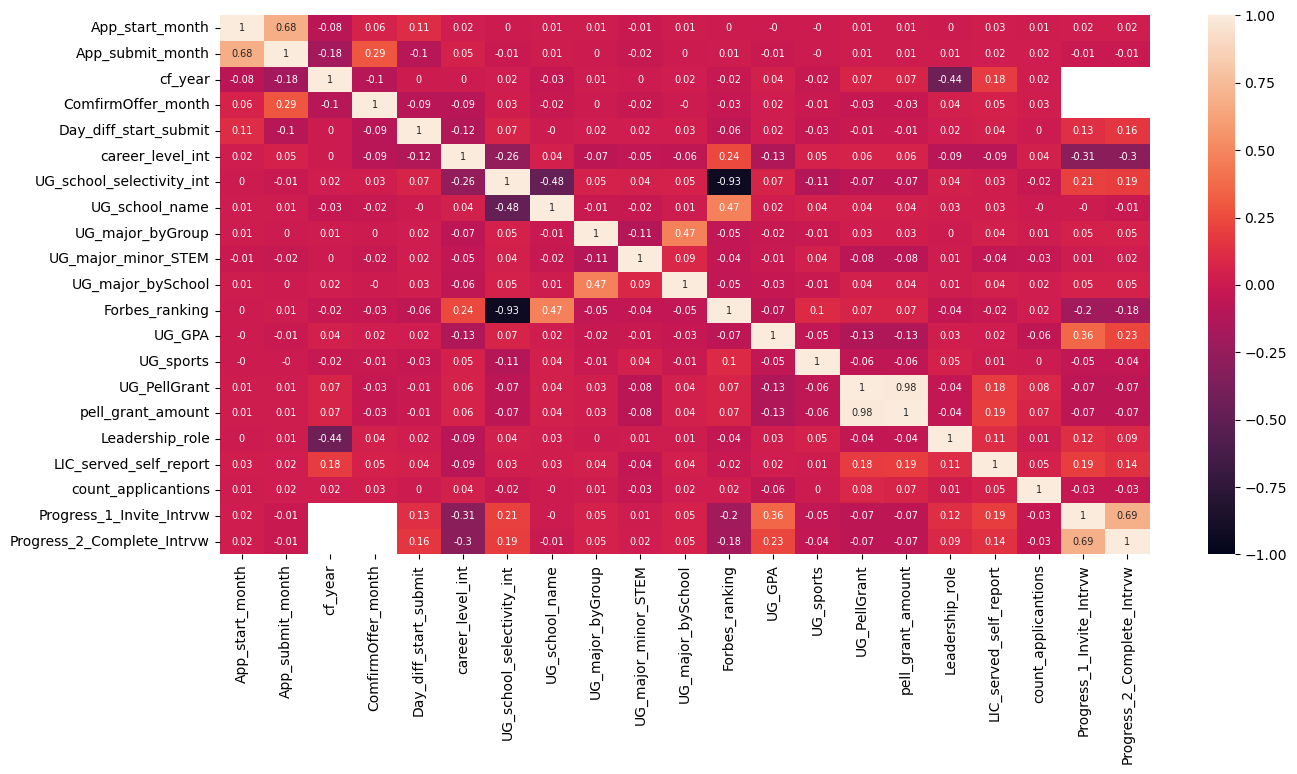

In [492]:
#Prorgress 1 interview invite
plt.figure(figsize=(15,7))
df4_corr=cs.corr(method ='pearson')
sns.heatmap(round(df4_corr,2),annot=True,annot_kws={"size": 7}, vmin=-1, vmax=1)

### 1.2) Correlation of Accepted to corp (Progress3)

In [91]:
ck = cd

In [92]:
ck = ck[['career_level_int','UG_school_selectivity_int','UG_school_name','UG_major_byGroup',
         'UG_major_minor_STEM','UG_major_bySchool','Forbes_ranking','UG_GPA','UG_sports',
         'SelectionDimension_1','SelectionDimension_2','SelectionDimension_3','SelectionDimension_4',
         'UG_PellGrant','Leadership_role','LIC_served_self_report',
         'count_applicantions','Progress_3_Accepted_toCorp']]

In [93]:
ck['Progress_3_Accepted_toCorp'] = ck['Progress_3_Accepted_toCorp'].replace(True,1).replace(False,0)

In [94]:
ck['UG_sports'] = ck['UG_sports'].replace(np.nan,0)
ck['Leadership_role'] = ck['Leadership_role'].replace(np.nan,0)
ck['LIC_served_self_report'] = ck['LIC_served_self_report'].replace(np.nan,0)
ck['UG_PellGrant'] = ck['UG_PellGrant'].replace('MAXIMUM',2).replace('NO',0).replace('PARTIAL',1)
ck['UG_sports'] = ck['UG_sports'].apply(pd.to_numeric)
ck['UG_PellGrant'] = ck['UG_PellGrant'].astype('category').cat.codes
ck['Progress_3_Accepted_toCorp'] = ck['Progress_3_Accepted_toCorp'].apply(pd.to_numeric)
ck['UG_major_bySchool']=ck['UG_major_bySchool'].astype('category').cat.codes
#ck['Match_Teach']=ck['Match_Teach'].astype('category').cat.codes
#ck['match_and_offer']=ck['match_and_offer'].astype('category').cat.codes
#ck['Uni_Match_state']=ck['Uni_Match_state'].astype('category').cat.codes
ck['UG_major_byGroup']=ck['UG_major_byGroup'].astype('category').cat.codes
ck['Leadership_role']=ck['Leadership_role'].astype('category').cat.codes
ck['UG_school_name']=ck['UG_school_name'].astype('category').cat.codes
ck['LIC_served_self_report']=ck['LIC_served_self_report'].astype('category').cat.codes

<AxesSubplot:>

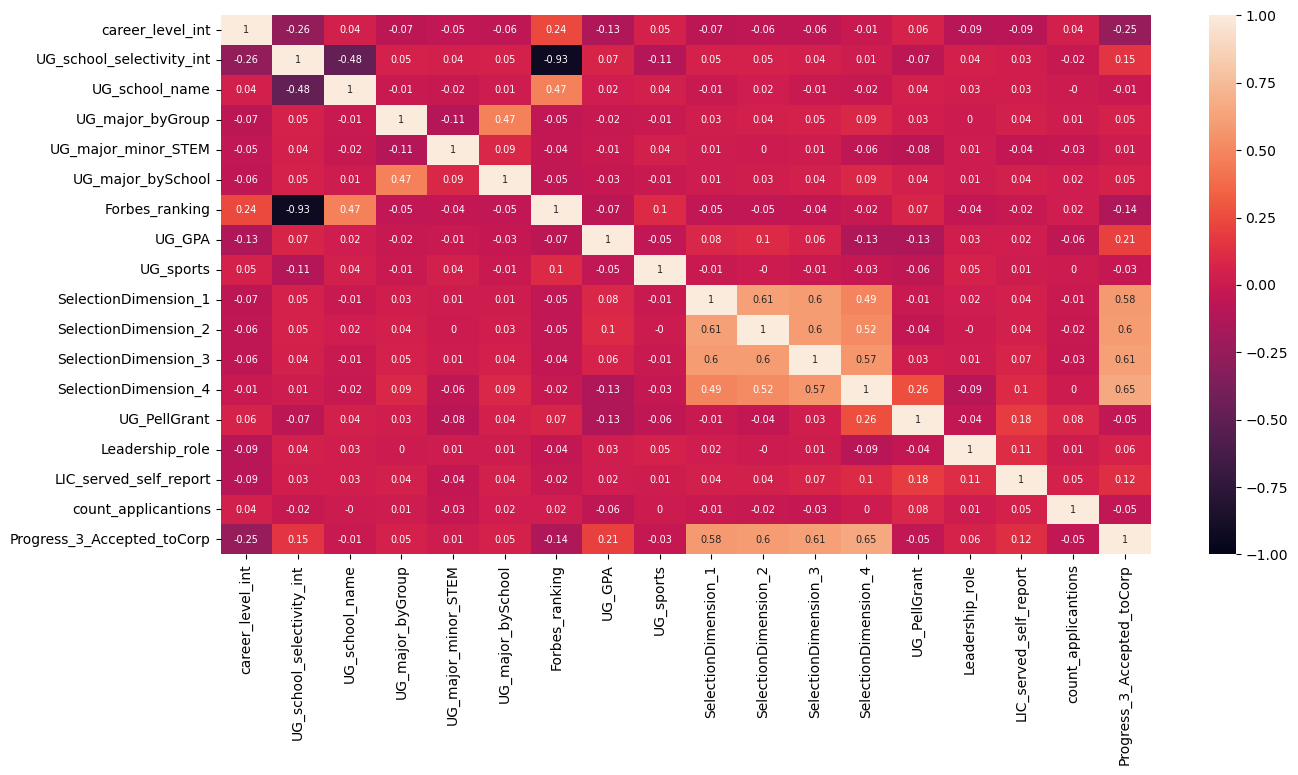

In [95]:
plt.figure(figsize=(15,7))
df5_corr=ck.corr(method ='pearson')
sns.heatmap(round(df5_corr,2),annot=True,annot_kws={"size": 7}, vmin=-1, vmax=1)

### 1.3) Correlation of Candidate confirmation to starting first day (Progress4 and 5)

Remove Selection dimension since it's for acceptance purpose in Progress3

In [112]:
cl = cd

In [113]:
cl = cl[['career_level_int','UG_school_selectivity_int','UG_school_name','UG_major_byGroup',
         'UG_major_minor_STEM','UG_major_bySchool','Forbes_ranking','UG_GPA','UG_sports',
         'Preference_Region_level','Preference_Region_rank','Match_region','Teach_region','Teach_subject','Uni_State',
         'Preferences_Subject_level','Match_Teach','Uni_Match_state',
         'cost_of_living_match_region','cost_of_living_teach_region','Teacher_starting_salary_match','Teacher_starting_salary_teach',
         'UG_PellGrant','Leadership_role','LIC_served_self_report',
         'count_applicantions','Progress_4_Comfirm_Offer','Progress_5_Start_1stDay']]

In [114]:
cl = cl.dropna(subset=['Match_region'])

In [116]:
cl['UG_sports'] = cl['UG_sports'].replace(np.nan,0)
cl['Leadership_role'] = cl['Leadership_role'].replace(np.nan,0)
cl['LIC_served_self_report'] = cl['LIC_served_self_report'].replace(np.nan,0)
cl['UG_PellGrant'] = cl['UG_PellGrant'].replace('MAXIMUM',2).replace('NO',0).replace('PARTIAL',1)
cl['UG_sports'] = cl['UG_sports'].apply(pd.to_numeric)
cl['UG_PellGrant'] = cl['UG_PellGrant'].astype('category').cat.codes
cl['UG_major_bySchool']=cl['UG_major_bySchool'].astype('category').cat.codes
cl['Match_Teach']=cl['Match_Teach'].replace('Yes',1).replace('No',0)
cl['Match_Teach']=cl['Match_Teach'].apply(pd.to_numeric)
cl['Uni_Match_state']=cl['Uni_Match_state'].replace('Yes',1).replace('No',0)
cl['UG_major_byGroup']=cl['UG_major_byGroup'].astype('category').cat.codes
cl['Leadership_role']=cl['Leadership_role'].astype('category').cat.codes
cl['UG_school_name']=cl['UG_school_name'].astype('category').cat.codes
cl['LIC_served_self_report']=cl['LIC_served_self_report'].astype('category').cat.codes
cl['Match_region']=cl['Match_region'].astype('category').cat.codes
cl['Teach_region']=cl['Teach_region'].astype('category').cat.codes
cl['Teach_subject']=cl['Teach_subject'].astype('category').cat.codes
cl['Uni_State']=cl['Uni_State'].astype('category').cat.codes

<AxesSubplot:>

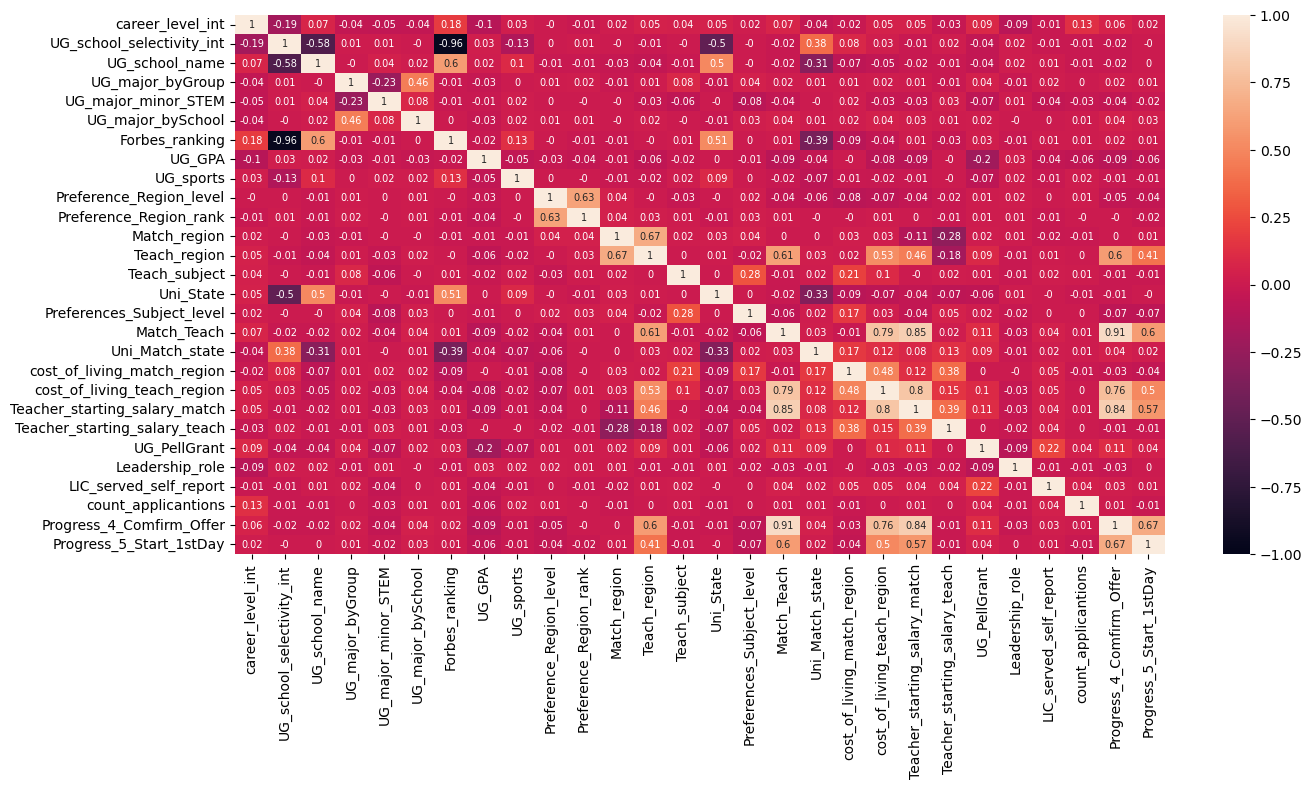

In [117]:
plt.figure(figsize=(15,7))
df6_corr=cl.corr(method ='pearson')
sns.heatmap(round(df6_corr,2),annot=True,annot_kws={"size": 7}, vmin=-1, vmax=1)

### 1.4) Correlation of factors that make candidate stays from Start day one until completion 2 years

## 2) Clustering

### 2.1) Clustering using Kmean for Progress 1 Interview invites candidates

In [19]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from pandas.api.types import is_string_dtype, is_numeric_dtype    

In [20]:
km = cd
#km['UG_GPA'] = km['UG_GPA'].mask((ac['UG_GPA'] >=3.67) & (ac['UG_GPA'] <4.0) , 3.83).mask(ac['UG_GPA'] == 4 , 4).mask((ac['UG_GPA'] >=3.33) & (ac['UG_GPA'] < 3.67), 3.5).mask((ac['UG_GPA'] >=3) & (ac['UG_GPA'] < 3.33), 3.17).mask((ac['UG_GPA'] >=2.67) & (ac['UG_GPA'] < 3) , 2.83).mask((ac['UG_GPA'] >=2.33) & (ac['UG_GPA'] < 2.67),2.5).mask((ac['UG_GPA'] >=2) & (ac['UG_GPA'] < 2.33),2.17).mask((ac['UG_GPA'] >=1.67) & (ac['UG_GPA'] < 2),1.83).mask((ac['UG_GPA'] >=1.33) & (ac['UG_GPA'] < 1.67),'D+').mask((ac['UG_GPA'] >=1) & (ac['UG_GPA'] < 1.33),'D').mask((ac['UG_GPA'] >=0.67) & (ac['UG_GPA'] < 1),'D-').mask((ac['UG_GPA'] < 0.67),'F')

In [21]:
km = km[['user_ID','career_level_int','UG_school_selectivity_int','UG_GPA']]

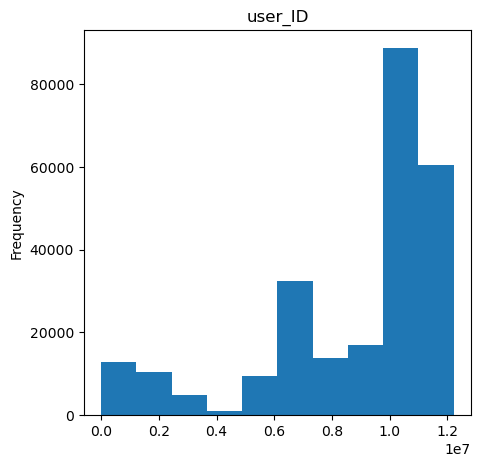

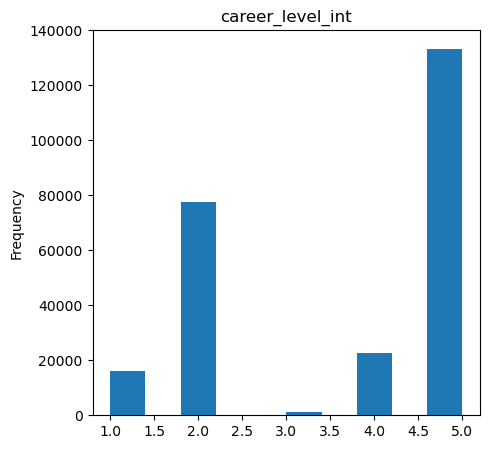

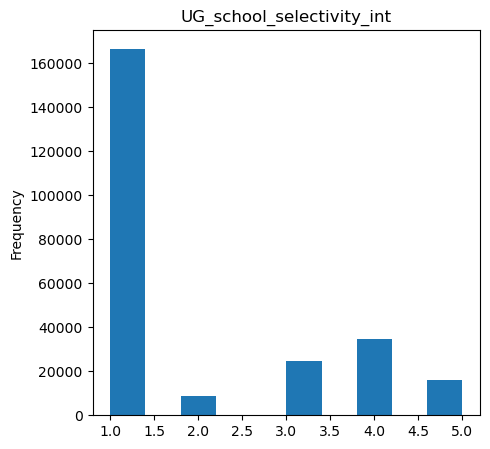

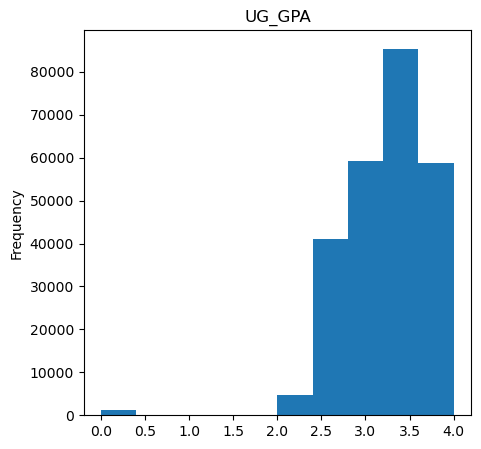

In [22]:
for column in km:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(km[column]):
        km[column].plot(kind='hist')
    elif is_string_dtype(km[column]):
        km[column].value_counts()[:10].plot(kind= 'bar')

In [23]:
km

,user_ID,career_level_int,UG_school_selectivity_int,UG_GPA
0,292,2,4,3.16
1,351,5,1,0.00
2,389,2,1,3.91
3,444,2,1,3.25
4,444,1,1,3.24
...,...,...,...,...
250597,12167669,4,1,2.70
250598,12173636,5,1,3.10
250599,12193281,5,5,3.89
250600,12194579,5,2,3.30


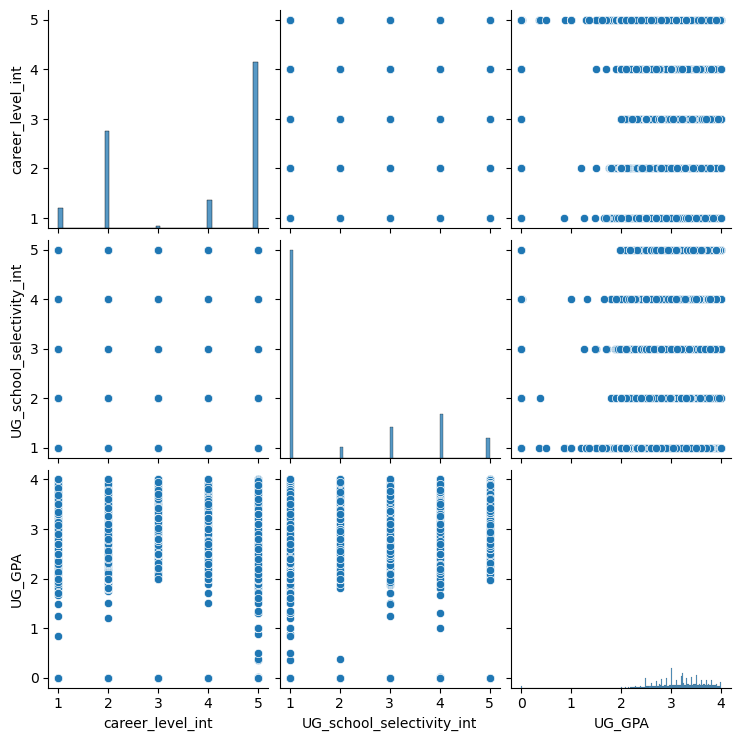

In [24]:
import seaborn as sns
columns = ["career_level_int","UG_school_selectivity_int","UG_GPA"]
sns.pairplot(km[columns])

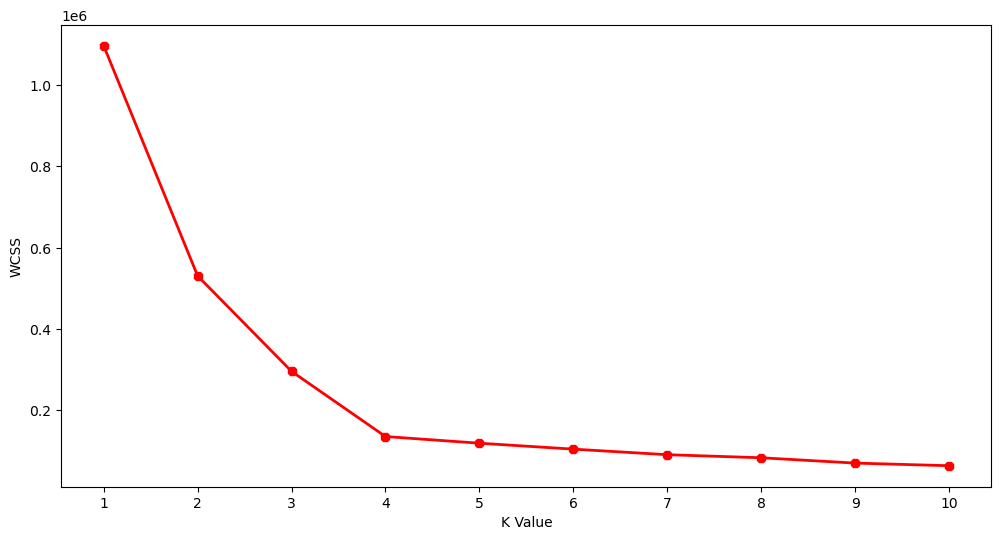

In [25]:
from sklearn.cluster import KMeans
x2 = km[["career_level_int","UG_school_selectivity_int","UG_GPA"]]

wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters =k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()    

In [26]:
km2 = KMeans(n_clusters=4)
y2 = km2.fit_predict(x2)
km["cluster5"] = y2
#The data with labels
km.head()

,user_ID,career_level_int,UG_school_selectivity_int,UG_GPA,cluster5
0,292,2,4,3.16,3
1,351,5,1,0.00,2
2,389,2,1,3.91,0
3,444,2,1,3.25,0
4,444,1,1,3.24,0


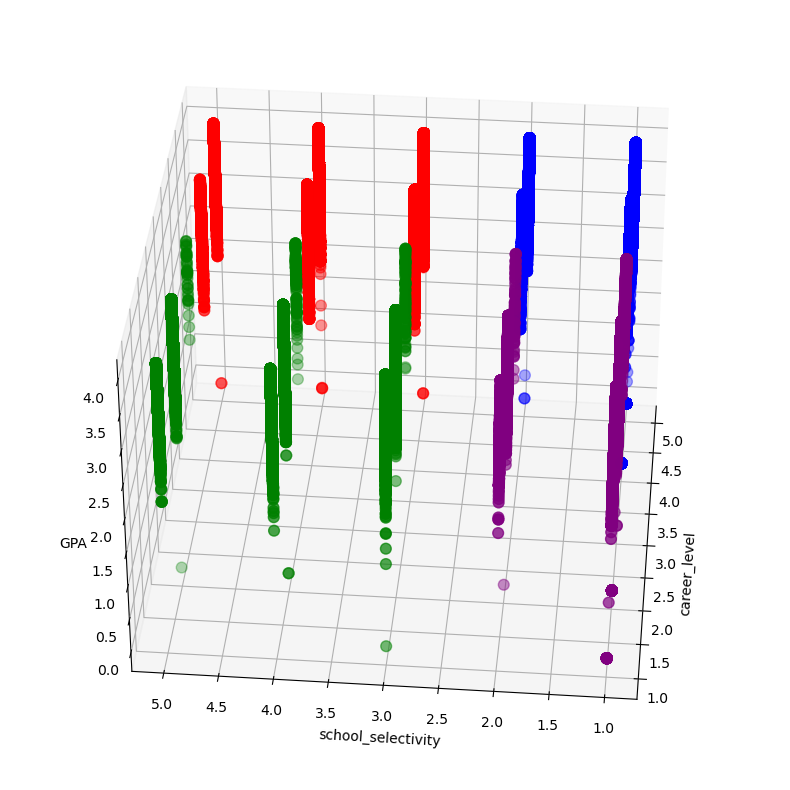

In [27]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(km.career_level_int[km.cluster5 == 0], km.UG_school_selectivity_int[km.cluster5 == 0], km.UG_GPA[km.cluster5 == 0], c='purple', s=60)
ax.scatter(km.career_level_int[km.cluster5 == 1], km.UG_school_selectivity_int[km.cluster5 == 1], km.UG_GPA[km.cluster5 == 1], c='red', s=60)
ax.scatter(km.career_level_int[km.cluster5 == 2], km.UG_school_selectivity_int[km.cluster5 == 2], km.UG_GPA[km.cluster5 == 2], c='blue', s=60)
ax.scatter(km.career_level_int[km.cluster5 == 3], km.UG_school_selectivity_int[km.cluster5 == 3], km.UG_GPA[km.cluster5 == 3], c='green', s=60)
ax.view_init(35, 185)
plt.xlabel("career_level")
plt.ylabel("school_selectivity")
ax.set_zlabel('GPA')
plt.show()

In [39]:
ckm =  cd.drop(['UG_GPA', 'career_level_int', 'UG_school_selectivity_int'], axis=1)

In [40]:
kmean_cluster_join1 = ckm.set_index('user_ID').join(km.set_index('user_ID'))

In [43]:
kmean_cluster_join1['applicant_cluster'] = kmean_cluster_join1['cluster5']

,App_submit_year,App_start_date,App_submit_date,Day_diff_start_submit,ComfirmOffer_date,career_level,UG_school_name,UG_school_selectivity,UG_major_byGroup,UG_major_bySchool,...,Teacher_starting_salary_teach,count_applicantions,App_start_month,App_submit_month,ComfirmOffer_month,career_level_int,UG_school_selectivity_int,UG_GPA,cluster5,applicant_cluster
user_ID,,,,,,,,,,,,,,,,,,,,,
292,2018,15/1/2018,15/1/2018,0,NaN,Undergrad,University of Minnesota - Twin Cities,More Selective,Political Science,Social Science,...,0,1,1,1.0,NaN,2,4,3.16,3,3
351,2016,1/12/2015,1/12/2015,0,NaN,Professional,Foreign University,NaN,Biological science,Physical Sciences,...,0,1,1,1.0,NaN,5,1,0.00,2,2
389,2016,6/11/2015,2/1/2016,57,18/12/2016,Undergrad,other,NaN,Education (elementary),Education,...,48428,1,6,2.0,12.0,2,1,3.91,0,0
444,2018,13/9/2017,13/9/2017,0,NaN,Undergrad,other,More Selective,International Studies/Relations,Humanities,...,0,2,9,9.0,NaN,2,1,3.25,0,0
444,2018,13/9/2017,13/9/2017,0,NaN,Undergrad,other,More Selective,International Studies/Relations,Humanities,...,0,2,9,9.0,NaN,1,1,3.24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167669,2022,2/3/2022,7/3/2022,5,NaN,Grad Student,other,More Selective,History,Social Science,...,0,1,2,7.0,NaN,4,1,2.70,2,2
12173636,2022,1/11/2021,29/11/2021,28,NaN,Professional,other,Most Selective,"Law, Government, Social Sci","Policy, Law, Communications",...,0,1,1,11.0,NaN,5,1,3.10,2,2
12193281,2022,18/10/2021,18/10/2021,0,NaN,Professional,University of California-Santa Barbara,Most Selective,Sociology,Social Science,...,0,1,10,10.0,NaN,5,5,3.89,1,1


In [496]:
kmean_cluster_join1.head(50)

,App_submit_year,App_start_date,App_submit_date,Day_diff_start_submit,ComfirmOffer_date,career_level,UG_school_name,UG_school_selectivity,UG_major_byGroup,UG_major_bySchool,...,Teacher_starting_salary_teach,count_applicantions,App_start_month,App_submit_month,ComfirmOffer_month,career_level_int,UG_school_selectivity_int,UG_GPA,cluster5,applicant_cluster
user_ID,,,,,,,,,,,,,,,,,,,,,
292,2018,15/1/2018,15/1/2018,0,NaN,Undergrad,University of Minnesota - Twin Cities,More Selective,Political Science,Social Science,...,0,1,1,1.0,NaN,2,4,3.160000,3,3
351,2016,1/12/2015,1/12/2015,0,NaN,Professional,Foreign University,NaN,Biological science,Physical Sciences,...,0,1,1,1.0,NaN,5,1,0.000000,2,2
389,2016,6/11/2015,2/1/2016,57,18/12/2016,Undergrad,other,NaN,Education (elementary),Education,...,48428,1,6,2.0,12.0,2,1,3.910000,0,0
444,2018,13/9/2017,13/9/2017,0,NaN,Undergrad,other,More Selective,International Studies/Relations,Humanities,...,0,2,9,9.0,NaN,2,1,3.250000,0,0
444,2018,13/9/2017,13/9/2017,0,NaN,Undergrad,other,More Selective,International Studies/Relations,Humanities,...,0,2,9,9.0,NaN,1,1,3.240000,0,0
444,2018,18/4/2017,21/4/2017,3,NaN,Junior,other,More Selective,International Studies/Relations,Humanities,...,0,2,4,4.0,NaN,2,1,3.250000,0,0
444,2018,18/4/2017,21/4/2017,3,NaN,Junior,other,More Selective,International Studies/Relations,Humanities,...,0,2,4,4.0,NaN,1,1,3.240000,0,0
474,2017,31/10/2016,31/10/2016,0,NaN,Professional,City University of New York John Jay College o...,Less Selective,Criminology / Criminal Justice,"Policy, Law, Communications",...,0,1,10,10.0,NaN,5,2,3.500000,2,2
612,2017,29/9/2016,13/11/2016,45,NaN,Professional,Foreign University,NaN,Anthropology & Archaeology,Humanities,...,0,1,9,11.0,NaN,5,1,3.221129,2,2


In [503]:
kmean_cluster_join1 = kmean_cluster_join1.reset_index()

In [504]:
kmean_cluster_join1 = kmean_cluster_join1.drop_duplicates(subset=['App_start_date','user_ID', 'Teach_region','App_submit_year'], keep='last')

In [507]:
kmean_cluster_join1.to_csv("master_data_final1.csv")

### 2.2) clustering Kmean for Progress 4 and 5 candidates

In [531]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sa = pd.read_csv("master_data_final1.csv")

In [532]:
st = sa.dropna(subset=['Match_Teach','Teach_region'])

In [533]:
st = st[['Teach_region','cost_of_living_teach_region']]

In [534]:
#st['Match_Teach']=st['Match_Teach'].replace('Yes',1).replace('No',0)
#st['Match_Teach']=st['Match_Teach'].apply(pd.to_numeric)
st=st.set_index('Teach_region')

In [535]:
st =pd.DataFrame(st.groupby(['Teach_region'])['cost_of_living_teach_region'].mean())

In [536]:
st

,cost_of_living_teach_region
Teach_region,
ALABAMA,5312.954053
APPALACHIA,4471.890579
ARKANSAS,3757.021277
ATLANTA,6224.531725
BALTIMORE,6094.687723
BAYAREA,9233.876399
BOSTONMETRO,6338.849483
CENTFLORIDA,6448.000000
CHARLOTTE,5082.589167


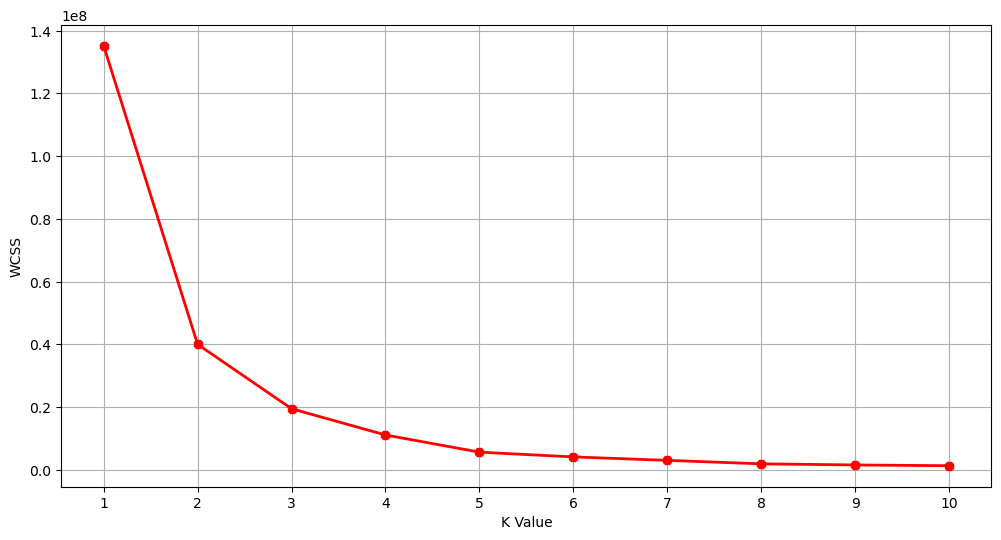

In [551]:
#Kmean with school group
from sklearn.cluster import KMeans
x4 = st[['cost_of_living_teach_region']]

wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters =k, init="k-means++")
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.grid()
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [552]:
km4 = KMeans(n_clusters=4)
y4 = km4.fit_predict(x4)
st["cluster"] = km4.labels_

In [553]:
st[["cost_of_living_teach_region","cluster"]].head(40)

,cost_of_living_teach_region,cluster
Teach_region,,
ALABAMA,5312.954053,1
APPALACHIA,4471.890579,1
ARKANSAS,3757.021277,1
ATLANTA,6224.531725,0
BALTIMORE,6094.687723,0
BAYAREA,9233.876399,2
BOSTONMETRO,6338.849483,0
CENTFLORIDA,6448.000000,0
CHARLOTTE,5082.589167,1


In [554]:
current_labels = [0,1, 2, 3]
desired_labels = [1,0, 3, 2]
# create a dictionary for your corresponding values
map_dict = dict(zip(current_labels, desired_labels))
map_dict

# map the desired values back to the dataframe
# note this will replace the original values
st['region_and_cost_cluster'] = st['cluster'].map(map_dict)

In [555]:
st = st.drop(['cluster'],axis =1)

In [556]:
current_labels = [0,1, 2, 3]
desired_labels = ['Lowest cost region','Relatively low cost region','Relatively high cost region', 'Highest cost region']
# create a dictionary for your corresponding values
map_dict = dict(zip(current_labels, desired_labels))
map_dict

st['region_and_cost_cluster_def'] = st['region_and_cost_cluster'].map(map_dict)

In [566]:
sl =  st.drop(['cost_of_living_teach_region'], axis=1)
sl =  st.reset_index()

KeyError: "['cost_of_living_teach_region_y'] not found in axis"

In [558]:
kmean_cluster_join2 = sa.merge(sl, on='Teach_region', how='left')

In [569]:
kmean_cluster_join2 = kmean_cluster_join2.drop(['cost_of_living_teach_region_y','Unnamed: 56','Unnamed: 57'],axis=1)

In [571]:
kmean_cluster_join2.to_csv('master_data_final2.csv')

In [572]:
kmean_cluster_join2

,user_ID,App_submit_year,App_start_date,App_submit_date,Day_diff_start_submit,ComfirmOffer_date,career_level,UG_school_name,UG_school_selectivity,UG_major_byGroup,...,App_start_month,App_submit_month,ComfirmOffer_month,career_level_int,UG_school_selectivity_int,UG_GPA,applicant_cluster,applicant_cluster_def,region_and_cost_cluster_def,region_and_cost_cluster
0,292,2018,15/1/2018,15/1/2018,0,NaN,Undergrad,University of Minnesota - Twin Cities,More Selective,Political Science,...,1,1.0,NaN,2,4,3.16,3,Junior to undergrad from more selectivity school,NaN,NaN
1,351,2016,1/12/2015,1/12/2015,0,NaN,Professional,Foreign University,NaN,Biological science,...,1,1.0,NaN,5,1,0.00,2,Professional from least selectivity school,NaN,NaN
2,389,2016,6/11/2015,2/1/2016,57,18/12/2016,Undergrad,other,NaN,Education (elementary),...,6,2.0,12.0,2,1,3.91,0,Junior to undergrad from least selectivity school,Relatively high cost region,2.0
3,444,2018,13/9/2017,13/9/2017,0,NaN,Undergrad,other,More Selective,International Studies/Relations,...,9,9.0,NaN,1,1,3.24,0,Junior to undergrad from least selectivity school,NaN,NaN
4,444,2018,18/4/2017,21/4/2017,3,NaN,Junior,other,More Selective,International Studies/Relations,...,4,4.0,NaN,1,1,3.24,0,Junior to undergrad from least selectivity school,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250597,12167669,2022,2/3/2022,7/3/2022,5,NaN,Grad Student,other,More Selective,History,...,2,7.0,NaN,4,1,2.70,2,Professional from least selectivity school,NaN,NaN
250598,12173636,2022,1/11/2021,29/11/2021,28,NaN,Professional,other,Most Selective,"Law, Government, Social Sci",...,1,11.0,NaN,5,1,3.10,2,Professional from least selectivity school,NaN,NaN
250599,12193281,2022,18/10/2021,18/10/2021,0,NaN,Professional,University of California-Santa Barbara,Most Selective,Sociology,...,10,10.0,NaN,5,5,3.89,1,Professional from more selectivity school,NaN,NaN
250600,12194579,2022,2/8/2021,4/8/2021,2,NaN,Professional,City University of New York Herbert H. Lehman ...,Less Selective,Sociology,...,2,4.0,NaN,5,2,3.30,2,Professional from least selectivity school,NaN,NaN


In [560]:
st = st.drop(['region_and_cost_cluster'],axis=1)
st

,cost_of_living_teach_region,region_and_cost_cluster_def
Teach_region,,
ALABAMA,5312.954053,Lowest cost region
APPALACHIA,4471.890579,Lowest cost region
ARKANSAS,3757.021277,Lowest cost region
ATLANTA,6224.531725,Relatively low cost region
BALTIMORE,6094.687723,Relatively low cost region
BAYAREA,9233.876399,Highest cost region
BOSTONMETRO,6338.849483,Relatively low cost region
CENTFLORIDA,6448.000000,Relatively low cost region
CHARLOTTE,5082.589167,Lowest cost region


In [561]:
st =st.reset_index()

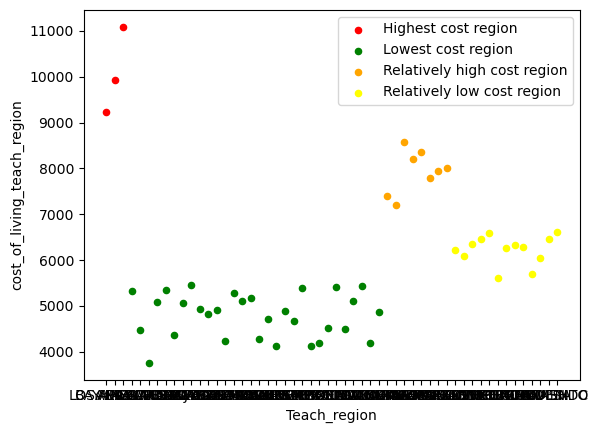

In [562]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

colors = {'Lowest cost region':'green', 'Relatively low cost region':'yellow', 'Relatively high cost region':'orange', 'Highest cost region':'red'}

grouped = st.groupby('region_and_cost_cluster_def')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x= 'Teach_region', y= 'cost_of_living_teach_region', label=key, color=colors[key])

plt.show()

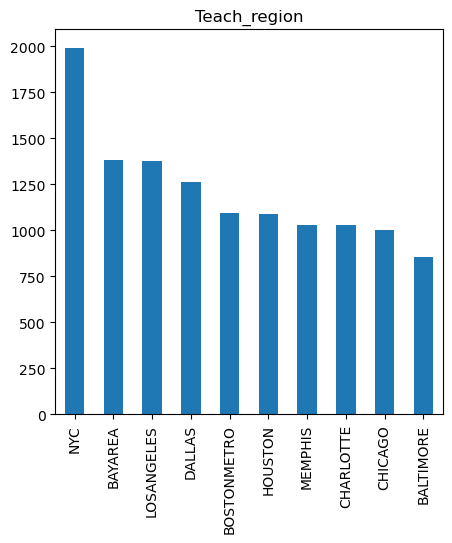

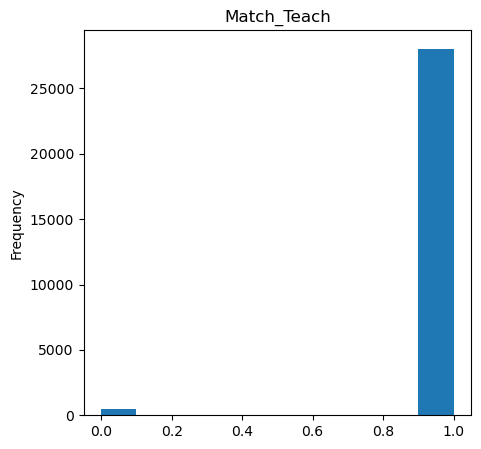

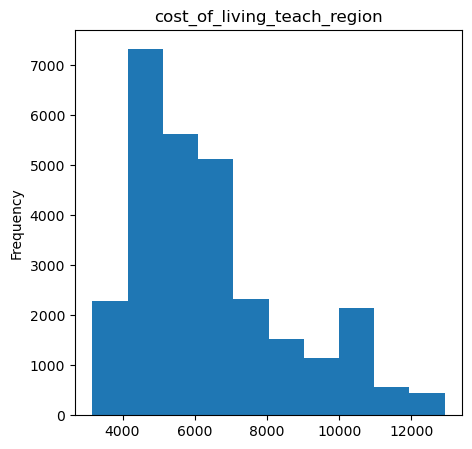

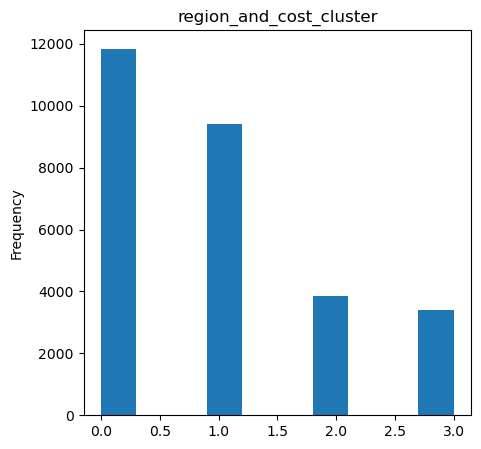

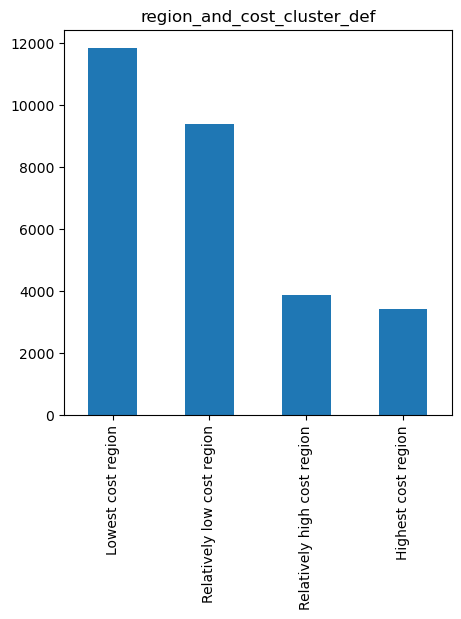

In [563]:
for column in vs:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(vs[column]):
        vs[column].plot(kind='hist')
    elif is_string_dtype(vs[column]):
        vs[column].value_counts()[:10].plot(kind= 'bar')

AttributeError: 'Line2D' object has no property 'ncols'

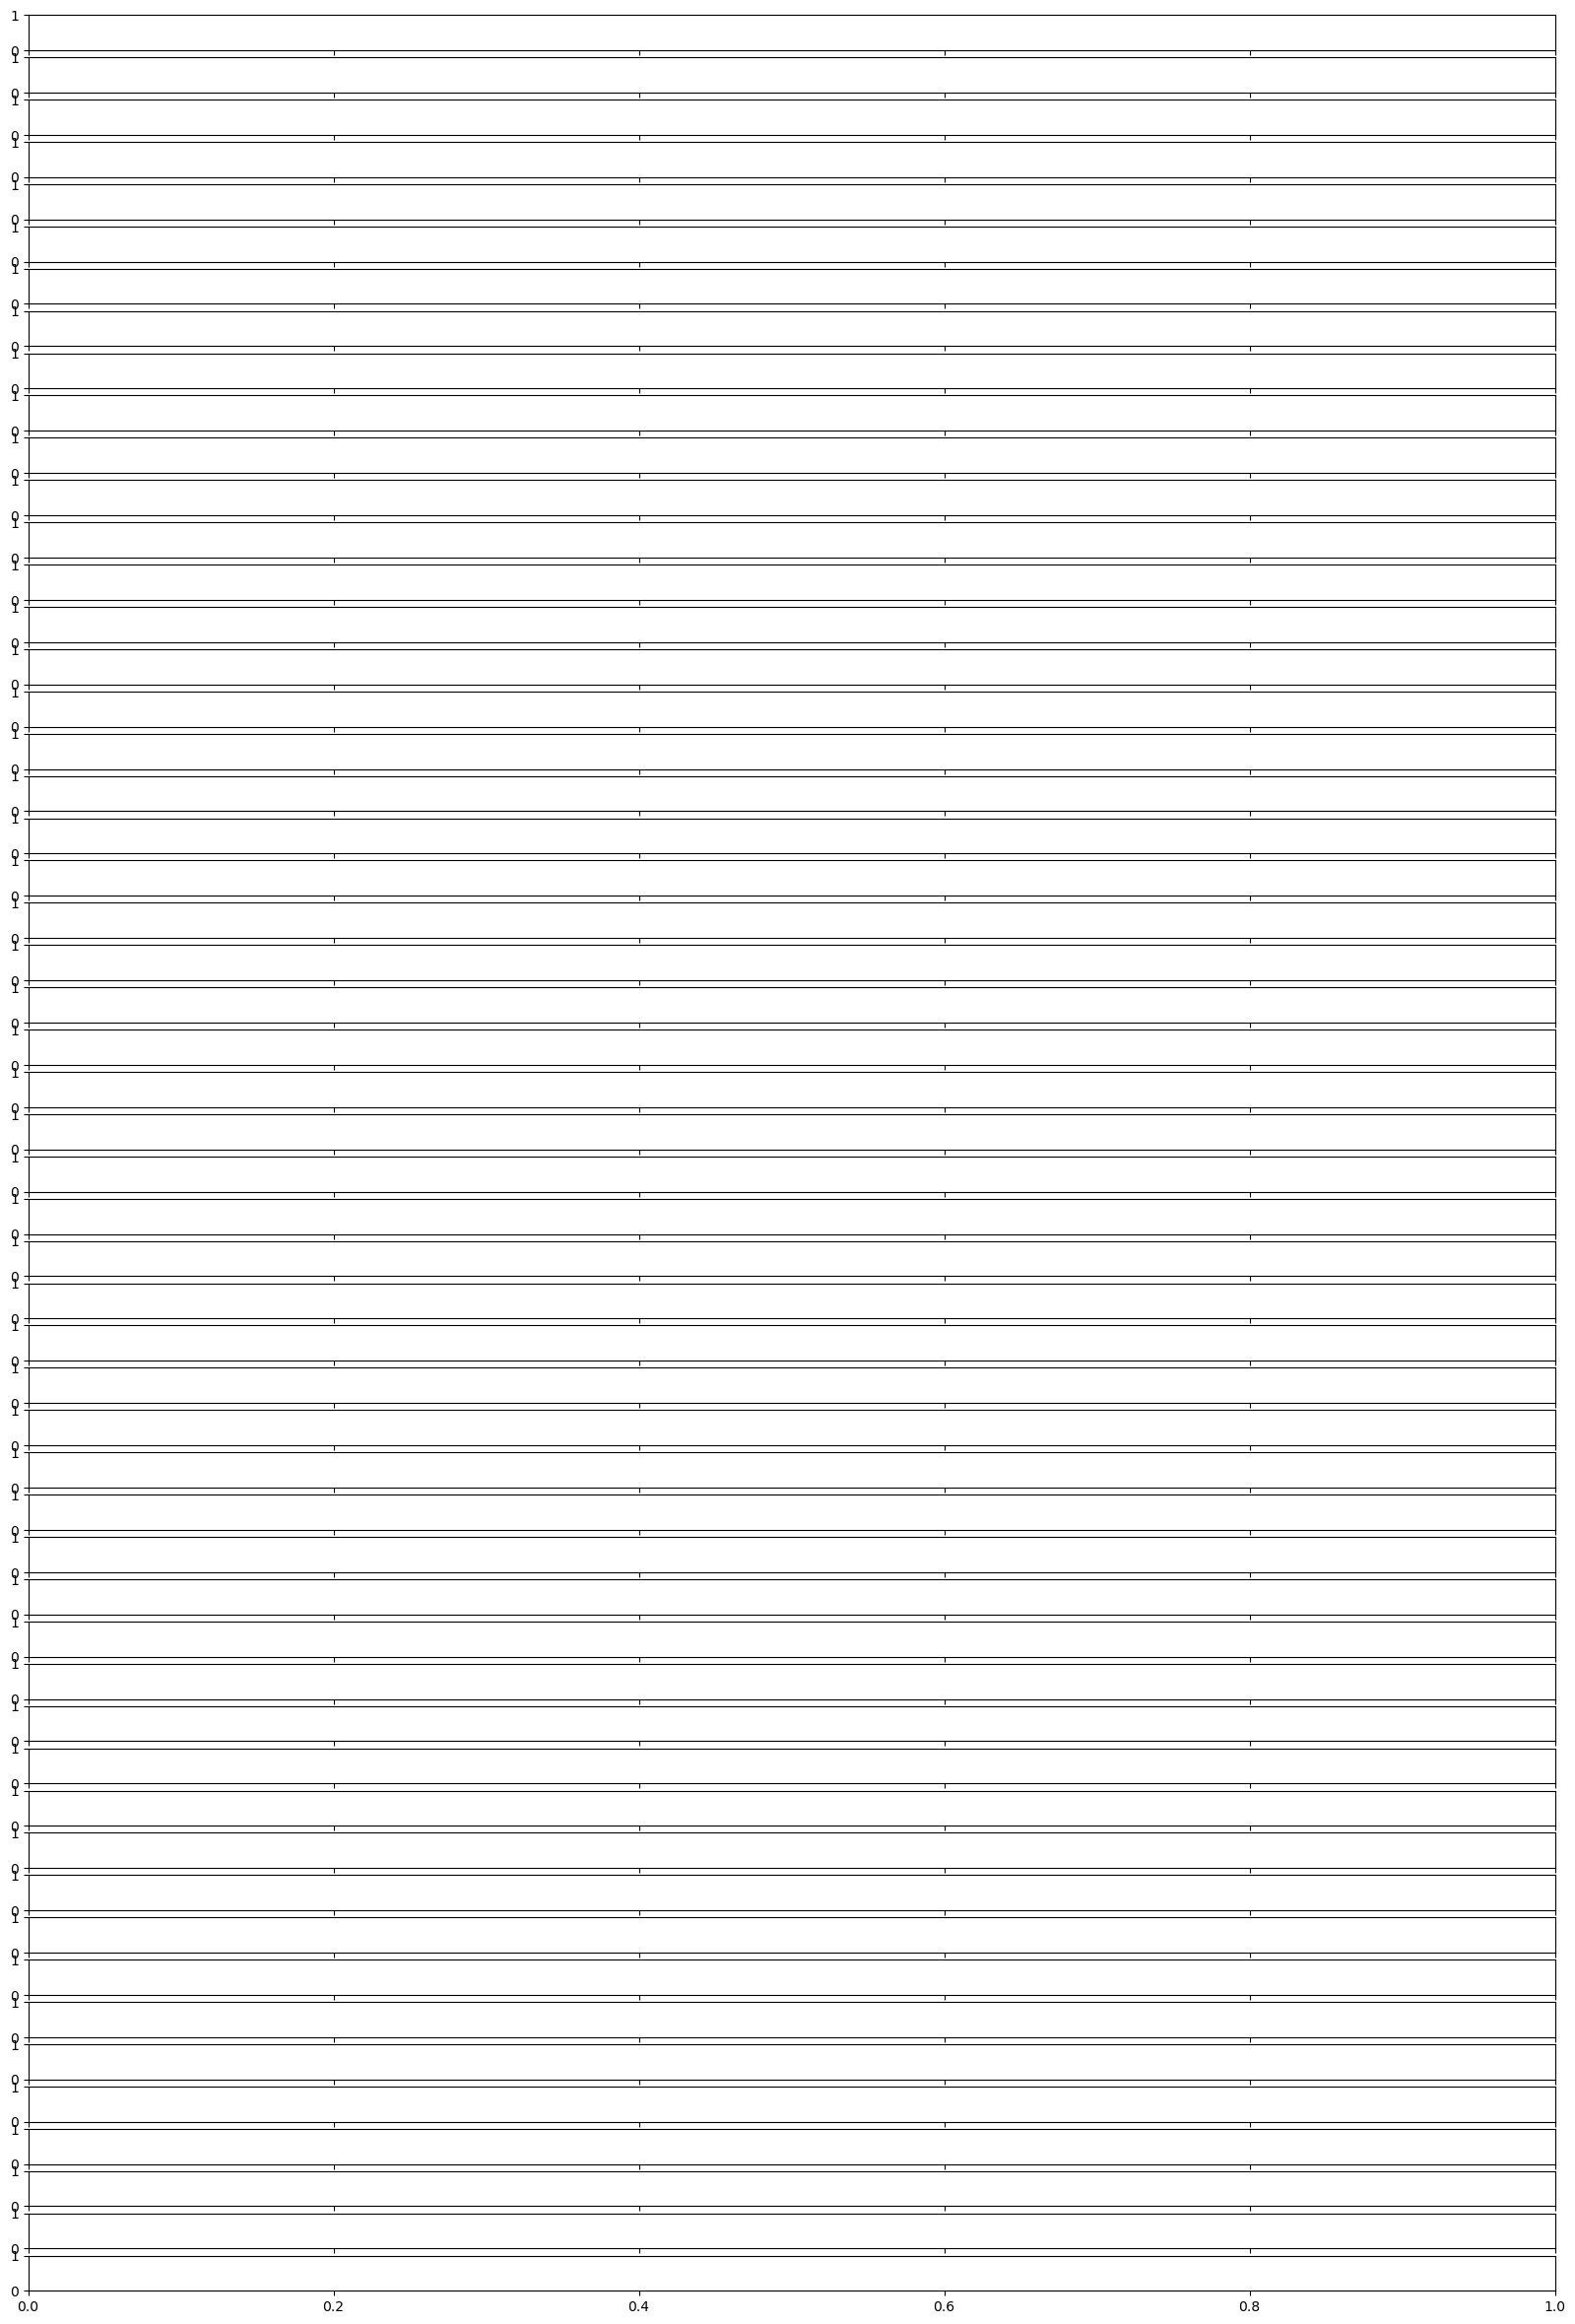

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

#num_var=30 #used to test the function with a short sample
num_var=len(variables_to_compare)
rows=math.ceil(num_var/5)
x=vs.cost_of_living_teach_region
y=vs.Match_Teach
miny=-40000 #min(df_final.mighist)
maxy=50000 #max(df_final.mighist)
j=0
i=0

def plotf(ax,x):
    g=sns.regplot(data=df_final[df_final["cluster_desc"]=="Significant Inbounds"],x=x, y="mighist",label="cluster_desc", color="limegreen", ax=ax)
    sns.regplot(data=df_final[df_final["cluster_desc"]=="Inbounds"],x=x, y="mighist",label="cluster_desc", color="yellowgreen", ax=ax)
    sns.regplot(data=df_final[df_final["cluster_desc"]=="Low Outbounds/Indbounds"],x=x, y="mighist",label="cluster_desc", color="gold", ax=ax)
    sns.regplot(data=df_final[df_final["cluster_desc"]=="Outbounds"],x=x, y="mighist",label="cluster_desc", color="lightcoral", ax=ax)
    sns.regplot(data=df_final[df_final["cluster_desc"]=="Significant Outbounds"],x=x, y="mighist",label="cluster_desc", color="red", ax=ax)
    g.set(title=None)
    return g
fig, ax= plt.subplots(figsize=(1,2)) 
P1 = mpatches.Patch(color='limegreen', label="Significant Inbounds")
P2 = mpatches.Patch(color='yellowgreen' ,label="Inbounds")
P3 = mpatches.Patch(color='gold' ,label="Low Outbounds/Indbounds")
P4 = mpatches.Patch(color='lightcoral' ,label="Outbounds")
P5 = mpatches.Patch(color='red' ,label="Significant Outbounds")
ax.legend(handles=[P1,P2,P3,P4,P5],  loc='center' )
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) ;
for spine in ['top', 'right', 'left', 'bottom']:
   ax.spines[spine].set_visible(False)
plt.show()
fig, ax= plt.subplots(nrows=rows, ncols=5,  figsize=(20,30), sharey=True)
for z in range(num_var):
   plotf(ax[i,j],str(variables_to_compare[z])) 
   ax[i,j].set_xlabel(short_names[z]) 
   ax[i,j].set_ylim(miny-1000, maxy+1000)
   if j!=0:
      ax[i,j].set_ylabel('') 
   if j<4:
      j=j+1
   else:
      j=0
      i=i+1

fig.tight_layout(h_pad=1)
 
plt.show()

In [326]:
vs.to_csv("teach_region_cost_cluster.csv")